<a href="https://colab.research.google.com/github/tomaszjezak/Content-Genius/blob/main/lstm_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM
import yfinance
import matplotlib.pyplot as plt

In [2]:
def plot_history(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    train_mae = history.history['mean_absolute_error']  # Updated to mean absolute error (MAE)
    test_mae = history.history['val_mean_absolute_error']  # Updated to mean absolute error (MAE)
    epochs = range(len(train_loss))

    # plot loss
    plt.clf()
    fig = plt.figure()
    plt.plot(train_loss, label='train_loss')
    plt.plot(test_loss, label='test_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(epochs)
    plt.legend(loc='best')
    plt.title('Training and Testing Loss')
    plt.show()

    # plot MAE
    plt.clf()
    fig = plt.figure()
    plt.plot(train_mae, label='train_mae')
    plt.plot(test_mae, label='test_mae')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.xticks(epochs)
    plt.legend(loc='best')
    plt.title('Training and Testing Mean Absolute Error')
    plt.show()


In [3]:
starbucks = yfinance.Ticker('SBUX')

In [4]:
df = starbucks.history(period="max")

In [5]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1992-06-26 00:00:00-04:00,0.258116,0.273479,0.251970,0.264262,224358400,0.0,0.0
1992-06-29 00:00:00-04:00,0.267334,0.288844,0.261188,0.282698,58732800,0.0,0.0
1992-06-30 00:00:00-04:00,0.288844,0.291917,0.270407,0.273479,34777600,0.0,0.0
1992-07-01 00:00:00-04:00,0.276553,0.282698,0.267334,0.279625,18316800,0.0,0.0
1992-07-02 00:00:00-04:00,0.282698,0.282698,0.273479,0.279625,13996800,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-20 00:00:00-05:00,105.209999,105.470001,103.860001,104.300003,9799500,0.0,0.0
2023-11-21 00:00:00-05:00,104.449997,104.680000,103.169998,103.690002,6149000,0.0,0.0
2023-11-22 00:00:00-05:00,104.160004,104.680000,103.279999,103.440002,4828700,0.0,0.0


In [6]:
df.reset_index(drop = True, inplace=True)
df = df[["Open","High","Low", "Close", "Volume"]]
df = df.iloc[-7900:]

In [7]:
df

,Open,High,Low,Close,Volume
13,0.301135,0.325718,0.298062,0.321108,17062400
14,0.322644,0.344154,0.313427,0.338009,15667200
15,0.336472,0.344154,0.328790,0.341081,19744000
16,0.344154,0.350300,0.338009,0.344154,7782400
17,0.341081,0.344154,0.331863,0.341081,10892800
...,...,...,...,...,...
7908,105.209999,105.470001,103.860001,104.300003,9799500
7909,104.449997,104.680000,103.169998,103.690002,6149000
7910,104.160004,104.680000,103.279999,103.440002,4828700
7911,103.440002,103.599998,102.470001,102.779999,3206400


In [8]:
train_data = df.iloc[:int((.8*len(df)))]
test_data = df.iloc[int(-(.2*len(df))):]

In [9]:
train_data

,Open,High,Low,Close,Volume
13,0.301135,0.325718,0.298062,0.321108,17062400
14,0.322644,0.344154,0.313427,0.338009,15667200
15,0.336472,0.344154,0.328790,0.341081,19744000
16,0.344154,0.350300,0.338009,0.344154,7782400
17,0.341081,0.344154,0.331863,0.341081,10892800
...,...,...,...,...,...
6328,47.096049,47.298442,46.629666,46.700062,13235300
6329,46.682459,46.990451,46.682459,46.796856,9235000
6330,47.166441,47.166441,46.796854,46.832054,7426500
6331,46.999253,47.008051,46.541668,46.770462,6674600


In [10]:
test_data

,Open,High,Low,Close,Volume
6333,46.920055,47.324841,46.629666,46.673664,7451700
6334,46.568061,46.717658,46.268874,46.374470,10370500
6335,46.761660,47.096050,46.462470,46.770462,12753200
6336,47.069638,48.169602,46.981639,47.914410,14547600
6337,47.483234,47.606429,47.210445,47.588833,11838500
...,...,...,...,...,...
7908,105.209999,105.470001,103.860001,104.300003,9799500
7909,104.449997,104.680000,103.169998,103.690002,6149000
7910,104.160004,104.680000,103.279999,103.440002,4828700
7911,103.440002,103.599998,102.470001,102.779999,3206400


In [11]:
train_x = train_data[train_data.index % 20 != 19]
train_y = train_data[train_data.index % 20 == 19]

In [12]:
test_x = test_data[test_data.index % 20 != 19]
test_y = test_data[test_data.index % 20 == 19]

In [13]:
train_x

,Open,High,Low,Close,Volume
13,0.301135,0.325718,0.298062,0.321108,17062400
14,0.322644,0.344154,0.313427,0.338009,15667200
15,0.336472,0.344154,0.328790,0.341081,19744000
16,0.344154,0.350300,0.338009,0.344154,7782400
17,0.341081,0.344154,0.331863,0.341081,10892800
...,...,...,...,...,...
6328,47.096049,47.298442,46.629666,46.700062,13235300
6329,46.682459,46.990451,46.682459,46.796856,9235000
6330,47.166441,47.166441,46.796854,46.832054,7426500
6331,46.999253,47.008051,46.541668,46.770462,6674600


In [14]:
train_y

,Open,High,Low,Close,Volume
19,0.341082,0.353373,0.338009,0.350300,7052800
39,0.304208,0.304208,0.298062,0.298062,2048000
59,0.338009,0.368737,0.328790,0.362591,24012800
79,0.384100,0.399465,0.377955,0.399465,14745600
99,0.396392,0.399465,0.390246,0.396392,12582400
...,...,...,...,...,...
6239,50.923309,50.958206,50.609236,50.879688,6474800
6259,52.799015,52.929877,52.572183,52.860085,7706400
6279,55.635797,55.907364,55.495635,55.846043,6058300
6299,51.833884,51.842646,50.773905,51.124313,7421200


In [15]:
model = tf.keras.Sequential([
    LSTM(50, activation='sigmoid', input_shape=(19,1), return_sequences=True),
    Dense(1)
])

In [16]:
learning_rate = 0.1
epochs = 200
momentum = 0.1
batch_size = 32

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

model.compile(optimizer=optimizer,
              loss='mean_absolute_error',  # Change to mean absolute error (MAE)
              metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Update metric to MAE

model.summary()

history = model.fit(new_train_x.values, train_y["Close"].values, epochs=epochs, batch_size=batch_size, validation_data=(new_test_x.values, test_y["Close"].values))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 19, 50)            10400     
                                                                 
 dense (Dense)               (None, 19, 1)             51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


NameError: ignored

<Figure size 640x480 with 0 Axes>

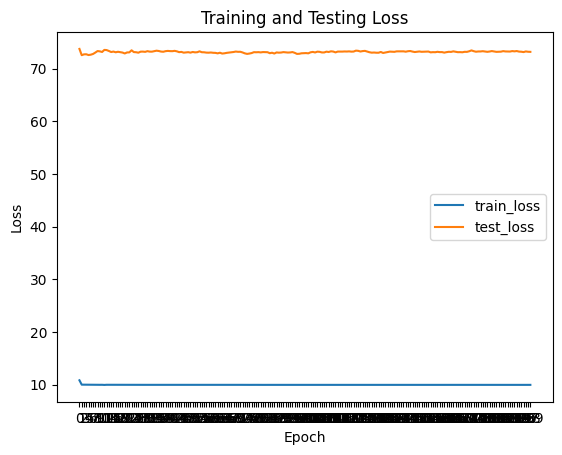

<Figure size 640x480 with 0 Axes>

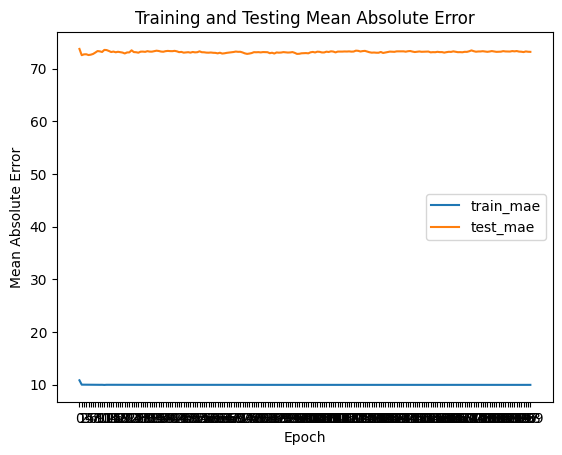

In [ ]:
plot_history(history)

In [ ]:
prediction = model.predict(new_train_x[-1:])

1/1 [==============================] - 0s 190ms/step


In [ ]:
print(prediction[0,-1,0])

7.091112


In [ ]:
new_train_x[-1:]

,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14,Close_15,Close_16,Close_17,Close_18,Close_19
315,50.992912,50.905315,50.835232,50.791439,50.826477,51.290768,50.756397,52.122971,47.287369,47.944378,48.557594,48.776596,48.566341,48.7328,47.976021,47.289642,46.700047,46.796848,46.832054


In [ ]:
train_y[-1:]

,Open,High,Low,Close,Volume
6319,48.382386,49.021877,46.788036,47.304886,53454800
